# SIMPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
class  SimLinReg():
    
    def __init__(self):
        self.m=None
        self.b=None

    
    def fit(self,X_train,Y_train):
        x_bar=np.mean(X_train)
        y_bar=np.mean(Y_train)
        
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            num+=((Y_train[i]-y_bar)*(X_train[i]-x_bar))
            den+=(X_train[i]-x_bar)**2
            
        self.m=num/den
        self.b=y_bar -(self.m) * x_bar
        print("m=",self.m ,"b=", self.b)
                 
        
    
  
    def predict(self,X_test):
        return self.m*X_test+self.b
    
   
   
    
    

In [4]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [234]:
ob=SimLinReg()

In [6]:
X_train=df.iloc[0:140,0:1].values
Y_train=df.iloc[0:140,2:3].values
X_test=df.iloc[140:160,0:1].values
Y_test=df.iloc[140:160,2:3].values

In [235]:
ob.fit(X_train,Y_train)


m= [0.94368231] b= [-0.0366795]


In [27]:
df.iloc[:,0:1]

,cgpa
0,7.19
1,7.46
2,7.54
3,6.42
4,7.23
...,...
995,8.87
996,9.12
997,4.89
998,8.62


In [246]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(df2['YearsExperience'],df2['Salary'],test_size=0.2,random_state=42)

In [247]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [248]:
print(lr.coef_)
print(lr.intercept_)

[[0.94368231]]
[-0.0366795]


In [132]:
Y_test

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [134]:
ob.predict(X_test[4])

array([0.49428162])

# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np


In [66]:
class  Multi_Lin_Reg():
    def __init__(self):
        self.coef_=None
        self.intercept_=None
    
    def fit(self,X_train,Y_train):
        
#        inserting a column of 1's at the begining
        cols=np.ones(X_train.shape[0])
        new_X=np.insert(X_train,0,cols,axis=1)
        
#        calculating coeffficient matrix
        p1=np.dot(new_X.T,new_X)
        p1=np.linalg.inv(p1)
        p2=np.dot(new_X.T,Y_train)
        betas=np.dot(p1,p2)
        
#         calculating intercept
        self.intercept_=betas[0];
        self.coef_=betas[1:]
        print("intercept\n",self.intercept_,"\ncoeff\n",self.coef_)
        
        
        
    def predict(self,X_test):
        Y_pred=self.intercept_+np.dot(X_test,self.coef_)
        return Y_pred

        
        

In [11]:
X_train=np.array([[9,2,3],[4,5,6]])
cols=np.ones(X_train.shape[0])
new_X=np.insert(X_train,0,cols,axis=1)
new_X

array([[1, 9, 2, 3],
       [1, 4, 5, 6]])

In [49]:
from sklearn.datasets import load_diabetes
X,Y=load_diabetes(return_X_y=True)


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
mr=Multi_Lin_Reg()
mr.fit(X_train,Y_train)

intercept
 151.34560453985998 
coeff
 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [71]:
k=mr.predict(X_test)
k.shape

(89,)

In [74]:
mr.intercept_

151.34560453985998

# SIMPLE LINEAR REGRESSION USING GRADIENT DESCENT

In [54]:
def calc_loss(Y,Y_hat):
    loss= (Y-Y_hat)**2
    loss=np.sum(loss)/Y.shape[0]
    return loss
# for calculating loss

def initialize():
    m=np.random.randn()
    b=np.random.randn()
    return m,b

def calc_accuracy(Y,Y_hat):
    Y_pred=Y_hat>=0.5
    return np.sum(Y_pred==Y)/Y.shape[0]

In [221]:
def gradient_descent(learning_rate,epochs,X,Y,Y_test):
    m,b=initialize()
    losses=[]
    epoch=[]
    for i in range(1,epochs+1):
        print(f"epoch{i}")
        Y_hat=m*X+b
        loss=calc_loss(Y,Y_hat)  
        print("loss",loss)
#         accuracy=calc_accuracy(Y,Y_hat)
#         print(accuracy)
        losses.append(loss)
        epoch.append(i)
        db=-2*np.sum(Y-m*X-b)/Y.shape[0]
        dm=-2*np.sum(X*(Y-m*X-b))/Y.shape[0]
        b=b-learning_rate*db
        m=m-learning_rate*dm
    
    return m,b,losses,epoch
    
    


In [58]:
k

epoch0
loss 7.756128085627834
0.4928571428571429
epoch1
loss 0.2534139414412648
0.5142857142857142
epoch2
loss 0.2526350152587964
0.5071428571428571
epoch3
loss 0.2526338689007058
0.5071428571428571
epoch4
loss 0.25263280352674455
0.5071428571428571
epoch5
loss 0.25263173850717857
0.5071428571428571
epoch6
loss 0.25263067383353616
0.5071428571428571
epoch7
loss 0.25262960950570384
0.5071428571428571
epoch8
loss 0.25262854552356945
0.5071428571428571
epoch9
loss 0.2526274818870207
0.5071428571428571


In [59]:
print(m)
print(b)

-0.05087514225567407
0.8687619797571375


In [66]:
print(X_test)

print("\n Y_test",Y_test)

[[6.85]
 [7.19]
 [7.66]
 [6.32]
 [6.67]
 [7.08]
 [6.75]
 [6.68]
 [6.86]
 [6.81]
 [8.53]
 [7.29]
 [7.78]
 [6.29]
 [7.57]
 [7.84]
 [6.4 ]
 [7.07]
 [5.74]
 [6.7 ]]

 Y_test [[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [70]:
print(m*7.08+b)


0.5085659725869651


In [203]:
df2=pd.read_csv("Salary_dataset.csv")
df2.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [204]:
 df2.drop(columns=['Unnamed: 0'],inplace=True)
df2.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [205]:
# standarize the data too please
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data = sc.fit_transform(df2)

# Put the scaled data back into the DataFrame, maintaining the same structure
df2_scaled = pd.DataFrame(scaled_data, columns=df2.columns)

In [206]:
df2_scaled.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


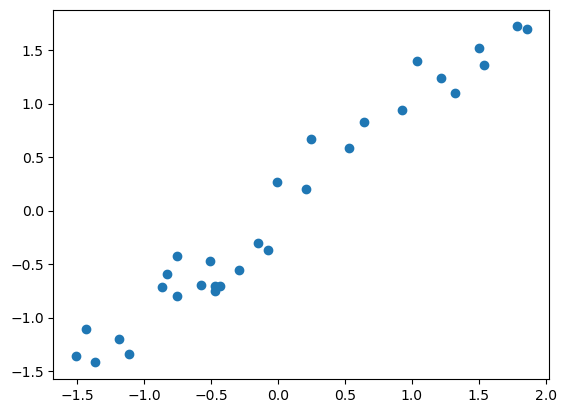

In [207]:
plt.scatter(df2_scaled['YearsExperience'],df2_scaled['Salary'])
plt.show()

In [208]:
df2_scaled.head(30)

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [209]:
X_train=df2_scaled.iloc[0:20,0:1].values
print("X_train\n",X_train.shape)
Y_train=df2_scaled.iloc[0:20,1:2].values
print("Y_train\n",Y_train.shape)
X_test=df2_scaled.iloc[20:30,0:1].values
print("X_test\n",X_test.shape)
Y_test=df2_scaled.iloc[20:30,1:2].values
print("Y_test\n",Y_test.shape)

X_train
 (20, 1)
Y_train
 (20, 1)
X_test
 (10, 1)
Y_test
 (10, 1)


In [227]:
X_test[0]

array([0.53281931])

In [228]:
Y_test[0]

array([0.58377993])

In [239]:
m,b,losses,epoch=gradient_descent(0.1,100,X_train,Y_train,Y_test)

epoch1
loss 8.16195281705334
epoch2
loss 4.517669463284771
epoch3
loss 2.6669891490340736
epoch4
loss 1.7148657063247537
epoch5
loss 1.2137818806667835
epoch6
loss 0.939919563902059
epoch7
loss 0.7812819818031544
epoch8
loss 0.6817730062206581
epoch9
loss 0.613245628228805
epoch10
loss 0.5615303331243948
epoch11
loss 0.5194511067835628
epoch12
loss 0.4833341159300516
epoch13
loss 0.4512621710493
epoch14
loss 0.4222018187885824
epoch15
loss 0.39556663237565654
epoch16
loss 0.3709985558548678
epoch17
loss 0.34825826486604916
epoch18
loss 0.32717004187306686
epoch19
loss 0.3075939222627767
epoch20
loss 0.28941149251184056
epoch21
loss 0.2725185318204434
epoch22
loss 0.2568210926686313
epoch23
loss 0.2422333173029128
epoch24
loss 0.2286761377408399
epoch25
loss 0.21607643211266314
epoch26
loss 0.20436642278202838
epoch27
loss 0.1934832080366125
epoch28
loss 0.1833683723643234
epoch29
loss 0.1739676469974702
epoch30
loss 0.1652306057951251
epoch31
loss 0.1571103882803129
epoch32
loss 0.1495

In [240]:
print(m,b)

0.8961727560631889 -0.07245266161577038


In [245]:
 print(m*X_test[0]+b)  

[0.40504549]


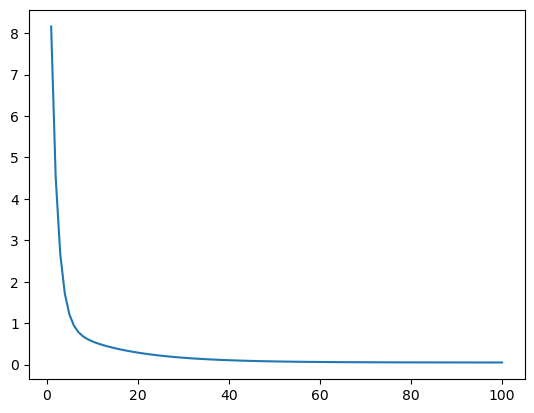

In [242]:
plt.plot(epoch,losses)

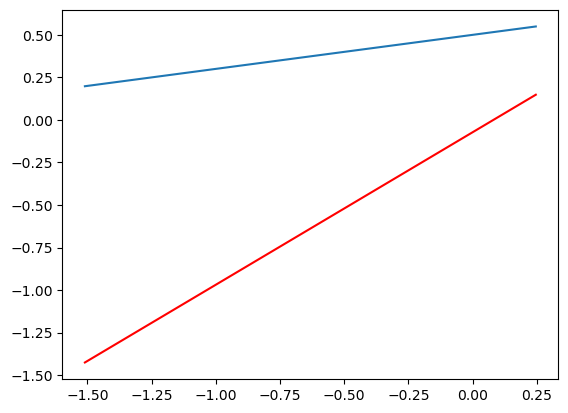

In [244]:
plt.plot(X_train,0.2*X_train+)
plt.plot(X_train,m*X_train+b,color="red")

# MULTIPLE LINEAR REGRESSION USING GRADIENT DESCENT

In [2]:
from sklearn.datasets import load_diabetes
ld=load_diabetes(as_frame=True)
ld['target']=ld.target
X=ld.data
Y=ld.target

sklearn.utils._bunch.Bunch

In [268]:
df3=pd.DataFrame(data=X)
df3['target']=ld.target

In [269]:
df3.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [279]:
df3.shape 

(442, 11)

In [289]:
scaled_target=sc.fit_transform(df3[['target']])
df3['target']=scaled_target

In [290]:
df3.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-0.014719
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-1.001659
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.144580
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.699513
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.222496


In [291]:
X_train3=df3.iloc[0:300,0:11].values
print("X_train\n",X_train3.shape)
Y_train3=df3.iloc[0:300,10:].values
print("Y_train\n",Y_train3.shape)
X_test3=df3.iloc[300:,0:11].values
print("X_test\n",X_test3.shape)
Y_test3=df3.iloc[300:,10:].values
print("Y_test\n",Y_test3.shape)

X_train
 (300, 11)
Y_train
 (300, 1)
X_test
 (142, 11)
Y_test
 (142, 1)


In [292]:
Y_train3

array([[-1.47194752e-02],
       [-1.00165882e+00],
       [-1.44579915e-01],
       [ 6.99512942e-01],
       [-2.22496178e-01],
       [-7.15965848e-01],
       [-1.83538046e-01],
       [-1.15749134e+00],
       [-5.47147277e-01],
       [ 2.05006151e+00],
       [-6.64021672e-01],
       [-1.07957508e+00],
       [ 3.48889755e-01],
       [ 4.26806019e-01],
       [-4.43258925e-01],
       [ 2.45001404e-01],
       [ 1.80071184e-01],
       [-1.05621783e-01],
       [-7.15965848e-01],
       [ 2.06043272e-01],
       [-1.09256112e+00],
       [-1.33929596e+00],
       [-1.09256112e+00],
       [ 1.20596866e+00],
       [ 4.13819975e-01],
       [ 6.47568766e-01],
       [-1.96524090e-01],
       [-8.71798376e-01],
       [-2.74440354e-01],
       [ 1.69943833e+00],
       [-3.00412442e-01],
       [-1.20943552e+00],
       [ 2.45262887e+00],
       [-8.45826288e-01],
       [-1.13151925e+00],
       [-6.51035629e-01],
       [ 1.46568953e+00],
       [ 1.60853602e+00],
       [ 1.2

In [303]:
def nd_gradient_descent(learning_rate, epochs, X, Y):
    # Initialize B0 = 0
    B0 = np.random.randn()

    # Initialize remaining parameters
    n = X.shape[0]  # Number of samples
    m = X.shape[1]  # Number of features
    losses=[]
    betas = np.random.randn(m)  # Initialize betas

    # Gradient Descent Loop
    for epoch in range(epochs):
        # Calculate prediction output (Y_hat)
        Y_hat = X @ betas + B0  # Matrix multiplication

        # Update B0
        dB0 = -2 * np.sum(Y - Y_hat) / n
        B0 = B0 - learning_rate * dB0

        # Update betas
        for i in range(m):
            dbi = -2 * np.sum((Y - Y_hat) * X[:, i]) / n  # Use X[:, i] for the i-th feature
            betas[i] = betas[i] - learning_rate * dbi

        # Optionally print loss for tracking
        loss = np.mean((Y - Y_hat) ** 2)  # Mean Squared Error
        losses.append(loss)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    return betas, B0,loss

    
    
        
    
    
    
    

In [312]:
betas,B0,loss=nd_gradient_descent(0.001,100,X_train3,Y_train3)

Epoch 1/100, Loss: 1.6116794550514881
Epoch 2/100, Loss: 1.1089248387318473
Epoch 3/100, Loss: 1.039999299772291
Epoch 4/100, Loss: 1.0305008170505345
Epoch 5/100, Loss: 1.0291563505237016
Epoch 6/100, Loss: 1.0289331914169793
Epoch 7/100, Loss: 1.0288647939006987
Epoch 8/100, Loss: 1.028817984041206
Epoch 9/100, Loss: 1.0287743535300926
Epoch 10/100, Loss: 1.0287313467759347
Epoch 11/100, Loss: 1.028688606279408
Epoch 12/100, Loss: 1.0286460807685192
Epoch 13/100, Loss: 1.028603761887974
Epoch 14/100, Loss: 1.0285616473463641
Epoch 15/100, Loss: 1.0285197357230484
Epoch 16/100, Loss: 1.0284780257303172
Epoch 17/100, Loss: 1.028436516107494
Epoch 18/100, Loss: 1.0283952056055161
Epoch 19/100, Loss: 1.028354092984611
Epoch 20/100, Loss: 1.0283131770138934
Epoch 21/100, Loss: 1.0282724564712475
Epoch 22/100, Loss: 1.0282319301432523
Epoch 23/100, Loss: 1.0281915968251152
Epoch 24/100, Loss: 1.0281514553206057
Epoch 25/100, Loss: 1.028111504441991
Epoch 26/100, Loss: 1.0280717430099715
Ep

In [313]:
print(betas)
print("\n B0",B0)

[-0.58680134  0.25245004 -1.96978385 -0.93646183 -0.73603768  0.63558758
 -0.43074698  0.02494363  0.32246009  0.27469406  0.05580492]

 B0 -0.04146204582278919


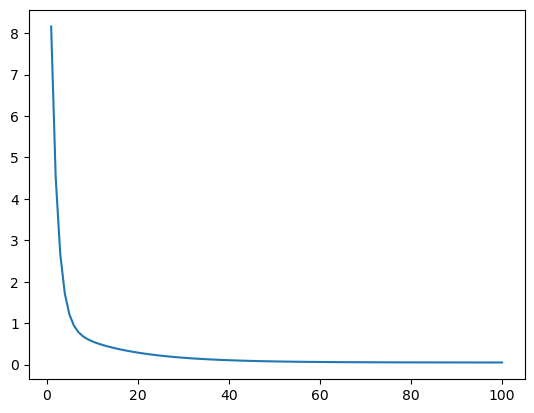

In [314]:
plt.plot(range(1,101),losses)